In [78]:
# Dependencies

import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt

#import json
#import requests

In [79]:
def daily_price_historical(symbol, comparison_symbol, all_data=True, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

In [80]:
df = daily_price_historical('BTC', 'USD')
print('Max length = %s' % len(df))
print('Max time = %s' % (df.timestamp.max() -df.timestamp.min()))
df_93 = df.tail(93)
df_93[df_93.timestamp<'20180201']

Max length = 2819
Max time = 2818 days 00:00:00


,close,high,low,open,time,volumefrom,volumeto,timestamp
2726,14754.13,15306.13,12934.16,13444.88,1514851200,137732.17,1.956783e+09,2018-01-01 16:00:00
2727,15156.62,15435.01,14579.71,14754.09,1514937600,106543.39,1.604207e+09,2018-01-02 16:00:00
2728,15180.08,15408.66,14244.67,15156.49,1515024000,110968.82,1.656715e+09,2018-01-03 16:00:00
2729,16954.78,17126.95,14832.36,15180.08,1515110400,141960.42,2.283989e+09,2018-01-04 16:00:00
2730,17172.30,17252.85,16286.57,16954.76,1515196800,83927.99,1.412704e+09,2018-01-05 16:00:00
2731,16228.16,17184.81,15791.13,17174.50,1515283200,79006.37,1.309533e+09,2018-01-06 16:00:00
2732,14976.17,16302.92,13902.31,16228.26,1515369600,142453.96,2.166367e+09,2018-01-07 16:00:00
2733,14468.50,15390.28,14221.55,14976.17,1515456000,99730.65,1.486802e+09,2018-01-08 16:00:00
2734,14919.49,14919.49,13450.54,14468.09,1515542400,142303.90,2.025084e+09,2018-01-09 16:00:00
2735,13308.06,14979.96,12825.95,14920.36,1515628800,173452.27,2.373494e+09,2018-01-10 16:00:00


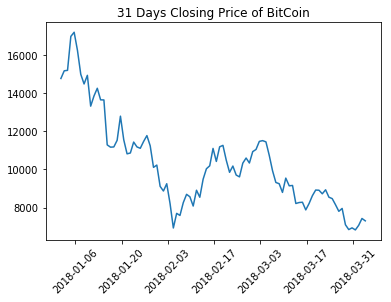

In [82]:
#plt.plot(df.timestamp, df.close)
plt.plot(df_93.timestamp, df_93.close)
plt.title("31 Days Closing Price of BitCoin")
plt.xticks(rotation=45)
plt.show()
plt.savefig('BTC_price_January')
